# Seminarska naloga pri predmetu statistika 2018/19

Ugrizi živali po lunarnih dnevih.

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib
import math
from scipy.stats import binom_test
from scipy.special import binom

from matplotlib import pyplot as plt

pd.options.display.max_rows = 20
pd.options.display.max_columns = 10

In [2]:
Podatki_Luna = pd.read_csv('STATISTIKA_PROJEKT\Luna.csv', encoding='latin1')
Podatki_Luna

,LUNARNI DAN,UGRIZOV
0,'16-18',137
1,'19-21',150
2,'22-24',163
3,'25-27',201
4,'28-1',269
5,'2-4',155
6,'5-7',142
7,'8-10',146
8,'11-13',148
9,'14-15',110


Izračunamo število vseh ugrizov ter dodamo stolpec, ki bo ponazarjal deleže ugrizev v posameznem obdobju.

In [3]:
Skupno_Stevilo_Ugrizov = Podatki_Luna['UGRIZOV'].sum()
print(Skupno_Stevilo_Ugrizov)
print(Skupno_Stevilo_Ugrizov*3/29)

1621
167.68965517241378


In [4]:
Podatki_Luna = Podatki_Luna.assign(DELEZ=Podatki_Luna['UGRIZOV'] / Skupno_Stevilo_Ugrizov)
Podatki_Luna

,LUNARNI DAN,UGRIZOV,DELEZ
0,'16-18',137,0.084516
1,'19-21',150,0.092535
2,'22-24',163,0.100555
3,'25-27',201,0.123998
4,'28-1',269,0.165947
5,'2-4',155,0.095620
6,'5-7',142,0.087600
7,'8-10',146,0.090068
8,'11-13',148,0.091302
9,'14-15',110,0.067859


<IPython.core.display.Javascript object>


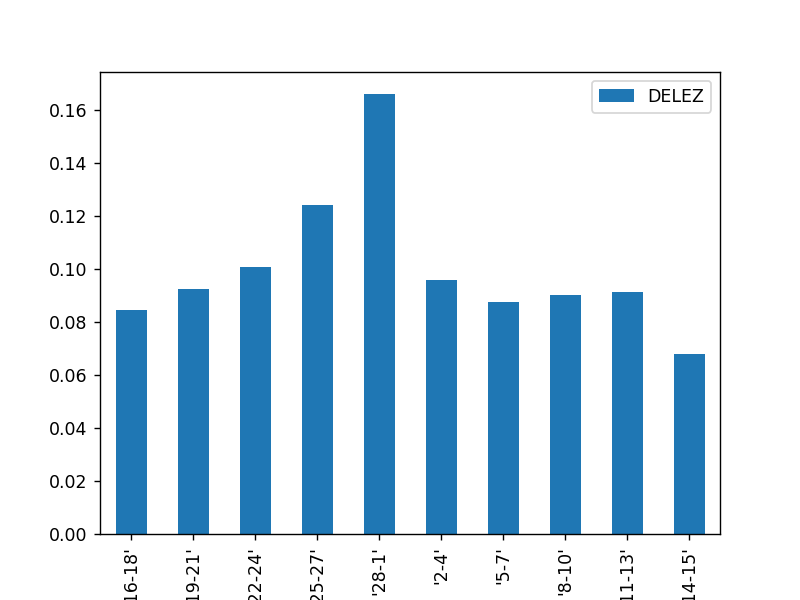

In [7]:
LUNARNI_DAN = Podatki_Luna['LUNARNI DAN']
DELEZ = Podatki_Luna['DELEZ']
Podatki_Luna.plot(x='LUNARNI DAN', y='DELEZ', kind='bar')

PAZI! Cikel '14-15' je potrebno primerno popraviti, saj je krajši od ostalih ciklov.
Za višino stolpcev bi bilo primerno vzeti število ugrizov na dan v posameznem ciklu.

In [15]:
seznam = []
seznam_na_dan = []
for i in Podatki_Luna['UGRIZOV']:
    if i == 110:
        i = i*3/2
    seznam.append(int(i))
print(seznam)
for j in seznam:
    seznam_na_dan.append(j/3)
print(seznam_na_dan)

[137, 150, 163, 201, 269, 155, 142, 146, 148, 165]
[45.666666666666664, 50.0, 54.333333333333336, 67.0, 89.66666666666667, 51.666666666666664, 47.333333333333336, 48.666666666666664, 49.333333333333336, 55.0]


<IPython.core.display.Javascript object>


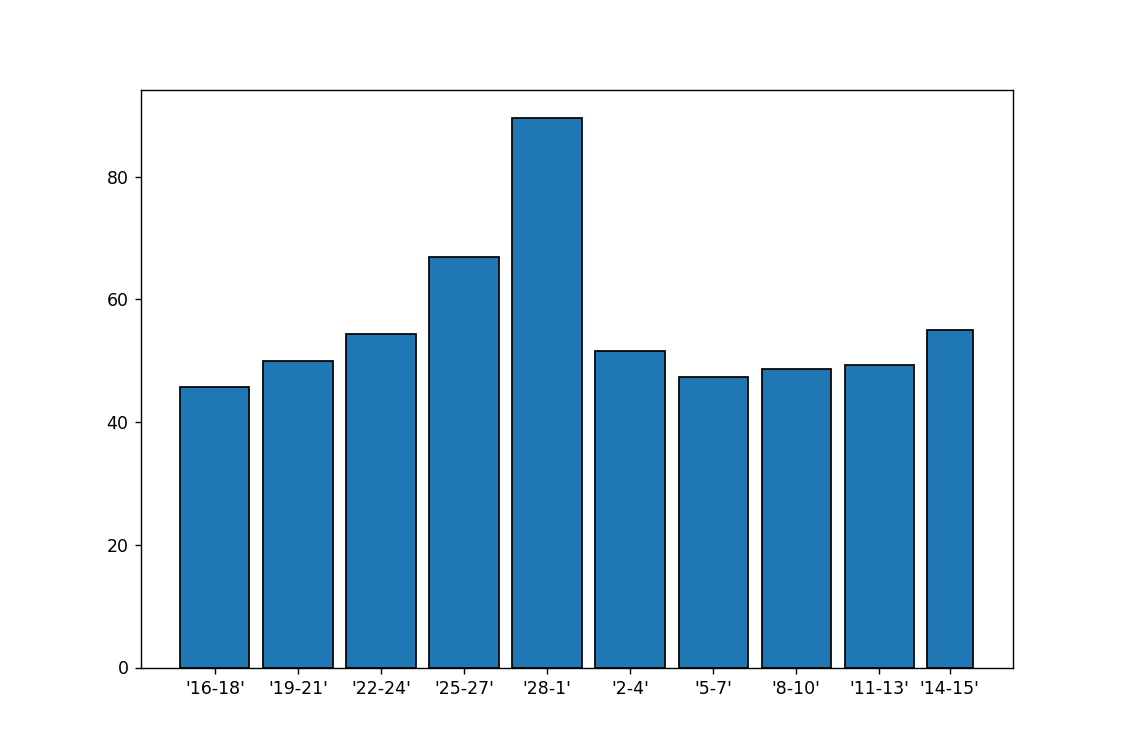

In [39]:
height = seznam_na_dan
x = Podatki_Luna['LUNARNI DAN']

plt.figure(figsize=(9,6))

# Širina in pozicija
width = [5,5,5,5,5,5,5,5,5,10/3]
y_pos = [0,6,12,18,24,30,36,42,48,53.1]
 
# Izrišemo graf
plt.bar(y_pos, height, width=width, edgecolor = "black")
plt.xticks(y_pos, x)
plt.show()

Izračunajmo sedaj našo statistiko T:

In [41]:
vsota1 = 0
realni_ugrizi = Podatki_Luna['UGRIZOV']
pricakovani_ugrizi = [167.68,167.68,167.68,167.68,167.68,167.68,167.68,167.68,167.68,111.79]
for i in range(0,10):
    vsota1 += ((realni_ugrizi[i] - pricakovani_ugrizi[i])**2)/pricakovani_ugrizi[i]
print(vsota1)

85.4847781888


Test za preverjanje, če so ugrizi okoli polne lune pogostejši:

In [5]:
cenilka_p = 269/Skupno_Stevilo_Ugrizov
print(cenilka_p)

0.16594694632942628


In [29]:
print(3/29)
print(269/Skupno_Stevilo_Ugrizov)

0.10344827586206896
0.16594694632942628


In [25]:
binom_test(269, n=1621, p=3/29)

1.6132424316531033e-14

In [4]:
((269-167)**2)/167

62.29940119760479